# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import requests
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
#test url to get API to evaluate information
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9fbfc1ccd40436e4a3068b35393f58b


In [4]:
  # Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
       
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ponta do sol
Processing Record 2 of Set 1 | mitsamiouli
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | bambous virieux
Processing Record 5 of Set 1 | port macquarie
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | tortoli
Processing Record 8 of Set 1 | vila velha
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 11 of Set 1 | luanda
Processing Record 12 of Set 1 | broken hill
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | carutapera
Processing Record 15 of Set 1 | san patricio
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | kahului
Processing Record 18 of Set 1 | tuatapere
Processing Record 19 of Set 1 | goderich
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 

Processing Record 34 of Set 4 | beloha
Processing Record 35 of Set 4 | luderitz
Processing Record 36 of Set 4 | port augusta
Processing Record 37 of Set 4 | grand gaube
Processing Record 38 of Set 4 | komsomolskiy
Processing Record 39 of Set 4 | port blair
Processing Record 40 of Set 4 | lebu
Processing Record 41 of Set 4 | isangel
Processing Record 42 of Set 4 | lagoa
Processing Record 43 of Set 4 | sembe
Processing Record 44 of Set 4 | umm kaddadah
Processing Record 45 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 46 of Set 4 | champerico
Processing Record 47 of Set 4 | kamaishi
Processing Record 48 of Set 4 | sinaloa
Processing Record 49 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 0 of Set 5 | san miguel
Processing Record 1 of Set 5 | kavieng
Processing Record 2 of Set 5 | tiksi
Processing Record 3 of Set 5 | roma
Processing Record 4 of Set 5 | okhotsk
Processing Record 5 of Set 5 | byron bay
Processing Record 6 of Set 5 | sitka
Process

Processing Record 22 of Set 8 | huai thalaeng
Processing Record 23 of Set 8 | ulladulla
Processing Record 24 of Set 8 | nuevitas
Processing Record 25 of Set 8 | bayji
Processing Record 26 of Set 8 | san angelo
Processing Record 27 of Set 8 | moose factory
Processing Record 28 of Set 8 | kloulklubed
Processing Record 29 of Set 8 | valpacos
Processing Record 30 of Set 8 | mehamn
Processing Record 31 of Set 8 | souillac
Processing Record 32 of Set 8 | srednekolymsk
Processing Record 33 of Set 8 | kingman
Processing Record 34 of Set 8 | sechura
Processing Record 35 of Set 8 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 36 of Set 8 | belle fourche
Processing Record 37 of Set 8 | touros
Processing Record 38 of Set 8 | mareeba
Processing Record 39 of Set 8 | gusev
Processing Record 40 of Set 8 | port-cartier
Processing Record 41 of Set 8 | auki
Processing Record 42 of Set 8 | alice springs
Processing Record 43 of Set 8 | donskoye
Processing Record 44 of Set 8 | hastings
P

Processing Record 10 of Set 12 | dolinsk
Processing Record 11 of Set 12 | izumo
Processing Record 12 of Set 12 | hengshui
Processing Record 13 of Set 12 | mount gambier
Processing Record 14 of Set 12 | conway
Processing Record 15 of Set 12 | naze
Processing Record 16 of Set 12 | savonlinna
Processing Record 17 of Set 12 | mulchen
Processing Record 18 of Set 12 | sur
Processing Record 19 of Set 12 | broome
Processing Record 20 of Set 12 | eregli
Processing Record 21 of Set 12 | jinji
Processing Record 22 of Set 12 | saint-joseph
Processing Record 23 of Set 12 | aklavik
Processing Record 24 of Set 12 | barreirinha
Processing Record 25 of Set 12 | zharkovskiy
Processing Record 26 of Set 12 | gannan
Processing Record 27 of Set 12 | chicama
Processing Record 28 of Set 12 | macaboboni
City not found. Skipping...
Processing Record 29 of Set 12 | pangkalanbuun
Processing Record 30 of Set 12 | kondrovo
Processing Record 31 of Set 12 | innisfail
Processing Record 32 of Set 12 | yayva
Processing 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ponta do sol,32.6667,-17.1000,65.71,74,100,1.86,PT,1670286841
1,mitsamiouli,-11.3847,43.2844,79.30,81,45,10.02,KM,1670286841
2,vaini,-21.2000,-175.2000,82.56,78,75,12.66,TO,1670286841
3,bambous virieux,-20.3428,57.7575,75.45,83,75,10.36,MU,1670286842
4,port macquarie,-31.4333,152.9167,75.33,66,15,18.34,AU,1670286842


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ponta do sol,32.6667,-17.1000,65.71,74,100,1.86,PT,1670286841
1,mitsamiouli,-11.3847,43.2844,79.30,81,45,10.02,KM,1670286841
2,vaini,-21.2000,-175.2000,82.56,78,75,12.66,TO,1670286841
3,bambous virieux,-20.3428,57.7575,75.45,83,75,10.36,MU,1670286842
4,port macquarie,-31.4333,152.9167,75.33,66,15,18.34,AU,1670286842


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

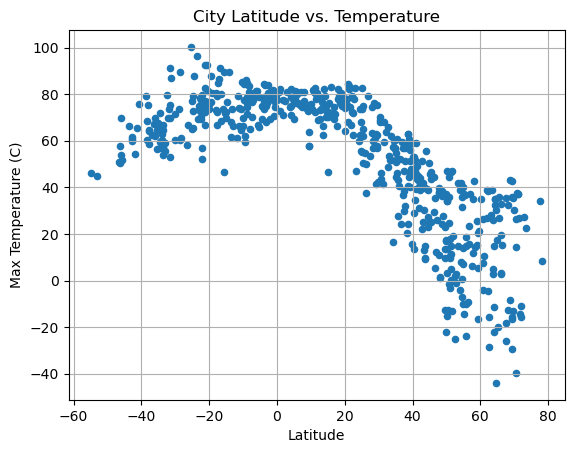

In [9]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter("Lat", "Max Temp")

plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

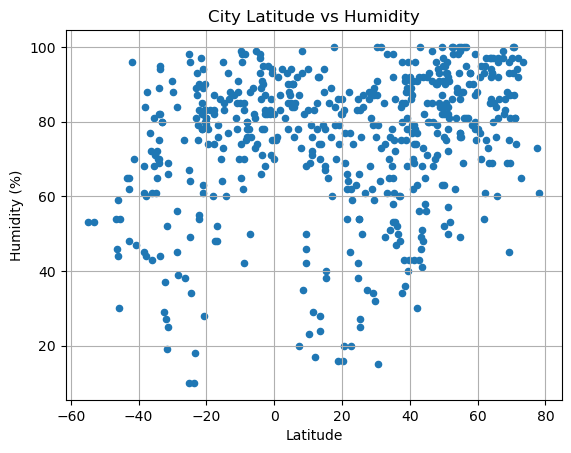

In [10]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter("Lat", "Humidity")

plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

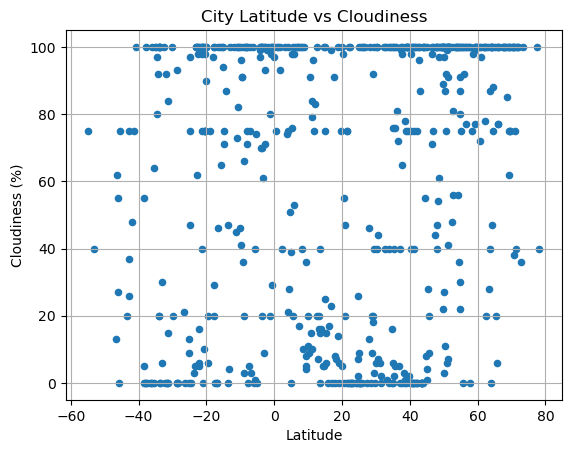

In [11]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter("Lat", "Cloudiness")

plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

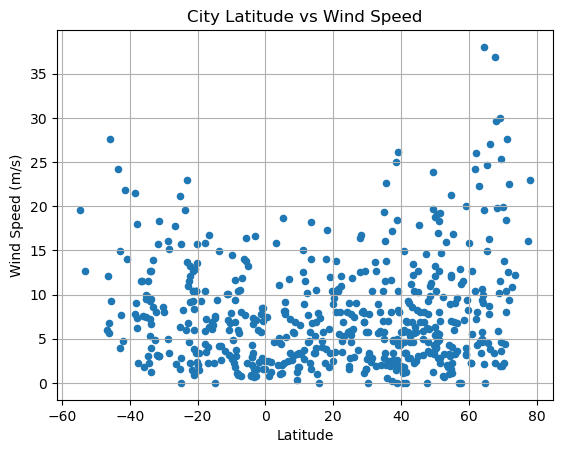

In [12]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter("Lat", "Wind Speed")

plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
 # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat'] >= 0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ponta do sol,32.6667,-17.1000,65.71,74,100,1.86,PT,1670286841
6,tortoli,39.9256,9.6572,58.82,88,0,5.75,IT,1670286843
13,san patricio,28.0170,-97.5169,74.53,86,46,12.57,US,1670286845
15,kahului,20.8947,-156.4700,84.22,69,20,10.36,US,1670286810
17,goderich,43.7501,-81.7165,39.52,48,100,10.36,CA,1670286846


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat'] < 0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mitsamiouli,-11.3847,43.2844,79.30,81,45,10.02,KM,1670286841
2,vaini,-21.2000,-175.2000,82.56,78,75,12.66,TO,1670286841
3,bambous virieux,-20.3428,57.7575,75.45,83,75,10.36,MU,1670286842
4,port macquarie,-31.4333,152.9167,75.33,66,15,18.34,AU,1670286842
5,ushuaia,-54.8000,-68.3000,46.02,53,75,19.57,AR,1670286842


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.673015715900863


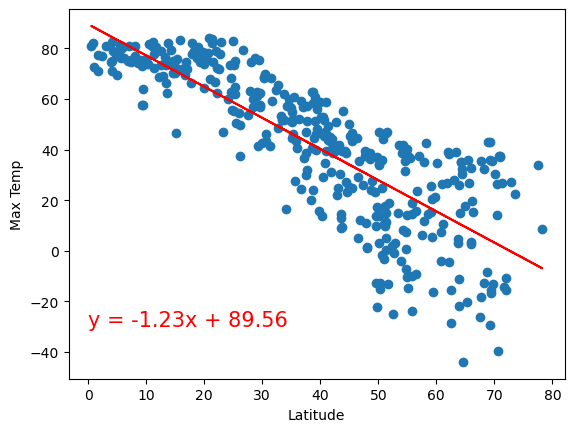

In [16]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

plot_linear_regression(x_values, y_values, 'Max Temp',(0,-30))
   


The r-value is: 0.2714499283670141


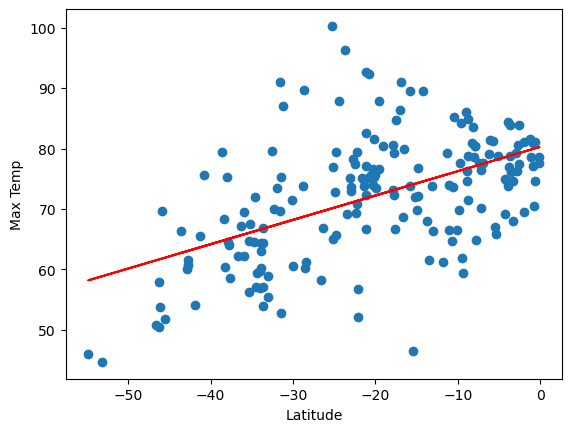

In [17]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

plot_linear_regression(x_values, y_values, 'Max Temp',(-55,32))

**Discussion about the linear relationship:** There is a negative correlation for temperature vs latitude in the northen hemisphere and a positive correlation for temperature vs latitue in the southern hemisphere.  This makes sense as when heading south in the northern hemisphere and north in the southern hemisphere brings you closer to the equator, which is the hottest area in the world.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.06781229616361586


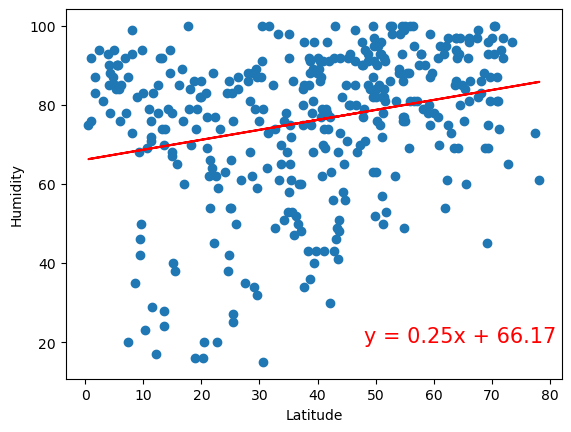

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

plot_linear_regression(x_values, y_values, 'Humidity',(48,20))

The r-value is: 0.1895424165750206


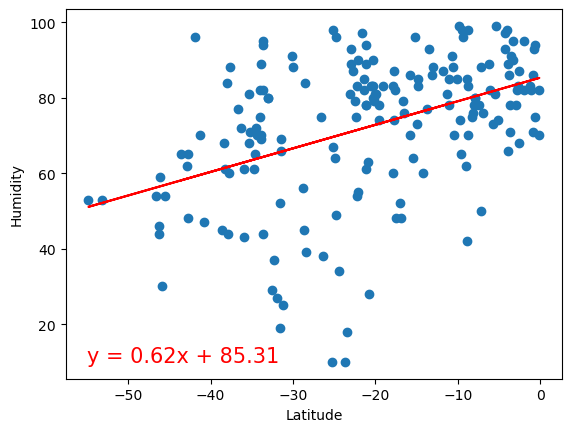

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

plot_linear_regression(x_values, y_values, 'Humidity',(-55,10))

**Discussion about the linear relationship:** There is no correlation between humidity and latitude in both hemispheres

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.10266879746362517


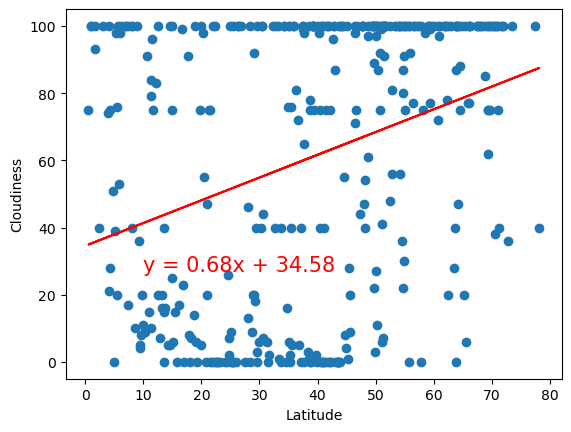

In [20]:
# Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

plot_linear_regression(x_values, y_values, 'Cloudiness',(10,27))

The r-value is: 0.07308010171831422


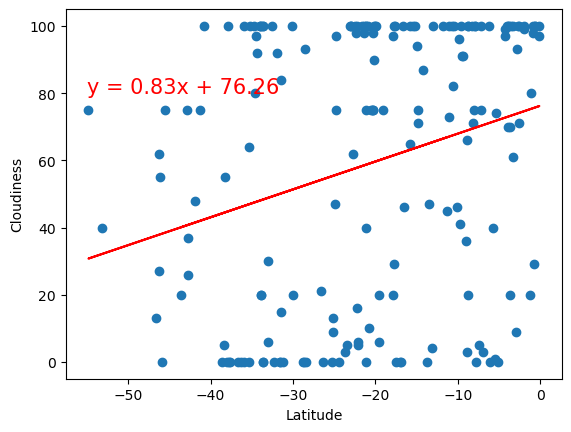

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

plot_linear_regression(x_values, y_values, 'Cloudiness',(-55,80))

**Discussion about the linear relationship:** There is no correlation in either hemisphere for Latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.07486139718652207


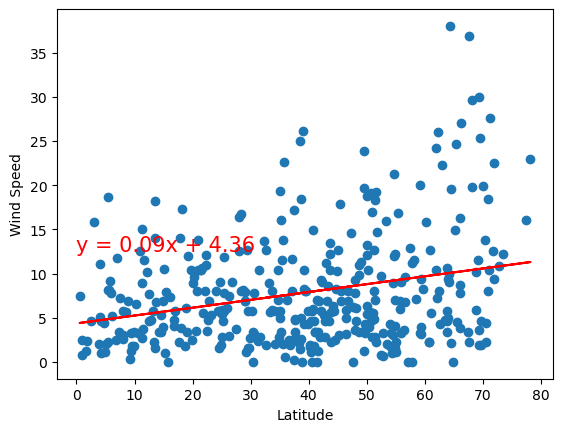

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

plot_linear_regression(x_values, y_values, 'Wind Speed',(-0,12.5))

The r-value is: 0.11812550019364766


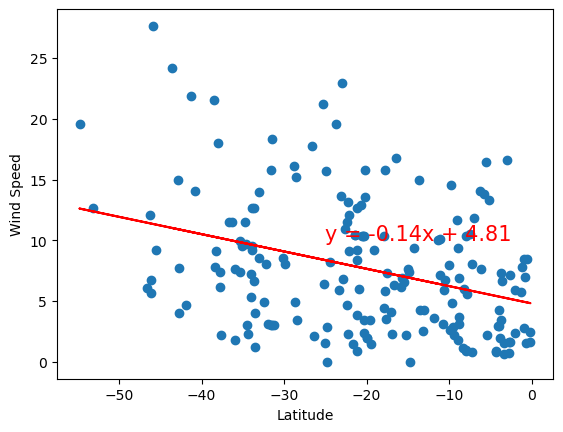

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

plot_linear_regression(x_values, y_values, 'Wind Speed',(-25,10))

**Discussion about the linear relationship:** There is no correlation in either hemisphere for latitude and windspeed.